# Linear equation systems

## 1. Linear Algebra Basics


In [1]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create a row vector

v_row = np.array([[1., -7, -9., 6., 3.]])

print(v_row)
print(v_row.shape)

[[ 1. -7. -9.  6.  3.]]
(1, 5)


In [3]:
# Create a column vector
v_col = np.array([[1.],[-7], [-9.], [6.], [3.]])

print(v_col)
print(v_col.shape)

[[ 1.]
 [-7.]
 [-9.]
 [ 6.]
 [ 3.]]
(5, 1)


### Linear algebra package:

In [4]:
import numpy.linalg as la

In [5]:
# Transpose 
v_row_t = v_row.T

print(v_row_t.shape)

print(v_row)
print(v_row.T)

(5, 1)
[[ 1. -7. -9.  6.  3.]]
[[ 1.]
 [-7.]
 [-9.]
 [ 6.]
 [ 3.]]


In [6]:
# Get norms

# https://en.wikipedia.org/wiki/Norm_(mathematics)

norm_v1  = la.norm(v_row_t, 1)
norm_v2  = la.norm(v_row_t, 2) # Magnitude of a vector
norm_inf = la.norm(v_row_t, np.inf)

print(norm_v1)
print(norm_v2)
print(norm_inf)

26.0
13.2664991614216
9.0


In [7]:
# Dot product

vec_1 = np.array([[1., 2., 3.]])
vec_2 = np.array([[4., 5., 6.]])

print(vec_1.shape, vec_2.shape)
print(vec_1.T.shape, vec_2.shape)
print(vec_2.shape, vec_1.T.shape)

# First dot product
vec_dot1 = np.dot(vec_1.T, vec_2)

# Second dot product
vec_dot2 = np.dot(vec_2, vec_1.T)

print(vec_dot1)
print(vec_dot2)

(1, 3) (1, 3)
(3, 1) (1, 3)
(1, 3) (3, 1)
[[ 4.  5.  6.]
 [ 8. 10. 12.]
 [12. 15. 18.]]
[[32.]]


In [8]:
# Matrix multiplication

p_matrix = np.array([[0., 5.], [3., 2.], [-1., 4.]])

print(p_matrix)
print(p_matrix.shape)

q_matrix = np.array([[1., -2., -1., 5., 6.], [0., 2., -5., 7., 8.]])

print(q_matrix)
print(q_matrix.shape)

[[ 0.  5.]
 [ 3.  2.]
 [-1.  4.]]
(3, 2)
[[ 1. -2. -1.  5.  6.]
 [ 0.  2. -5.  7.  8.]]
(2, 5)


In [9]:
# Multiply them

mult_pq1 = np.dot(p_matrix, q_matrix)

print(mult_pq1)
print(mult_pq1.shape)

[[  0.  10. -25.  35.  40.]
 [  3.  -2. -13.  29.  34.]
 [ -1.  10. -19.  23.  26.]]
(3, 5)


In [10]:
# Multiply them

mult_pq2 = p_matrix @ q_matrix

print(mult_pq2)
print(mult_pq2.shape)

[[  0.  10. -25.  35.  40.]
 [  3.  -2. -13.  29.  34.]
 [ -1.  10. -19.  23.  26.]]
(3, 5)


In [11]:
# Determinant

m = np.array([[0., 1., 2.], [-1., 5., 7.], [-2., 3., 9.]])

print(m)

det_m = la.det(m)

print(det_m)

[[ 0.  1.  2.]
 [-1.  5.  7.]
 [-2.  3.  9.]]
9.000000000000002


In [12]:
# Inverting the matrix

inv_m = la.inv(m)

print(inv_m)

[[ 2.66666667 -0.33333333 -0.33333333]
 [-0.55555556  0.44444444 -0.22222222]
 [ 0.77777778 -0.22222222  0.11111111]]


## 2. Linear equation systems

Here we will see a few methods to solve linear systems of equations:

$ax + by = c$ 

$dx + ey = f$

Most these methods rely on linear algebra.

The most commonly-used linear algebra packages in python are:

- numpy.linalg()
- scipy.linalg()

## Example:

Solve:

$2x -3y = 1$ 

$4x + 5y = -2$

## 1. Graphic solution:

This method relies on finding the intersections points between the linear equations.

To do this, we:

1. Generate a vector for $x$.


2. Define: $y_1$ for the first equation, and $y_2$ for the second one.


3. Before and after the intersection point, the sign of the difference between the two will change, so we need to compute it with np.sign(y2 -y1).


4. Then, we calculate the differences between the vector values produced by the sign function, np.diff(Asign). We will always get zeroes, except at the intersection point.


5. Finally, we grab the index (idx) of the non-zero value and see to which x and y values that index corresponds: x[idx] and y[idx].


6. This pair (x[idx], y[idx]) is our solution, which you can always double check in a plot.


In [13]:
# Generate vector
x = np.arange(-5., 5., 0.01)


$2x -3y = 1$ 

$4x + 5y = -2$

In [14]:
# Get both y values

y1 = (2.*x - 1.)/3.

y2 = (-2. - 4.*x)/5.

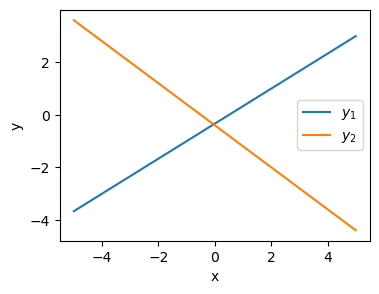

In [15]:
plt.figure(figsize=(4,3))

plt.plot(x, y1, label = r"$y_1$")
plt.plot(x, y2, label = r"$y_2$")

plt.legend()

plt.xlabel(r"x")
plt.ylabel(r"y")

plt.show()

In [16]:
# Get sign vector

a_sign = np.sign(y2 - y1)

print(a_sign)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1

In [17]:
# Get difference

a_diff = np.diff(a_sign)

print(a_diff)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

In [18]:
# Get index with non-zero value
# https://numpy.org/doc/stable/reference/generated/numpy.argwhere.html

a_arg = np.argwhere(a_diff).flatten()

print("Index of the non-zero value: ", a_arg)

Index of the non-zero value:  [495]


In [19]:
print("Solution is:", float(x[a_arg]), float(y1[a_arg]))

Solution is: -0.050000000000105516 -0.36666666666673703


/tmp/ipykernel_5378/3067358620.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Solution is:", float(x[a_arg]), float(y1[a_arg]))


In [20]:
# In one go:

idx = np.argwhere(np.diff(np.sign(y2 - y1))).flatten()

In [21]:
print("Solution is:", float(x[idx]), float(y1[idx]))

Solution is: -0.050000000000105516 -0.36666666666673703


/tmp/ipykernel_5378/634624592.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Solution is:", float(x[idx]), float(y1[idx]))


In [22]:
# What is flatten() used for?

example_arr = np.array([[1, -1],[2, 4]])

print(example_arr)

print(example_arr.shape)

# Use flatten()

example_arr_flat = example_arr.flatten()

print(example_arr_flat)

example2_arr = np.array([[1],[5]])

print(example2_arr)

print(example2_arr.shape)

example2_arr_flat = example2_arr.flatten()

print(example2_arr_flat)

print(example2_arr_flat.shape)

[[ 1 -1]
 [ 2  4]]
(2, 2)
[ 1 -1  2  4]
[[1]
 [5]]
(2, 1)
[1 5]
(2,)


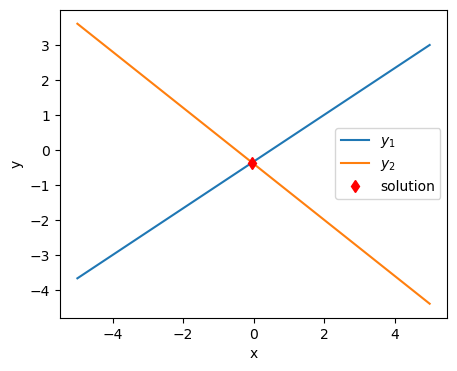

In [23]:
# Graphical solution

fig, ax = plt.subplots(figsize=(5,4))
ax.plot(x, y1, label = r"$y_1$")
ax.plot(x, y2, label = r"$y_2$")

ax.plot(x[idx], y1[idx], 'd', c = 'red', label = "solution")

ax.legend()

ax.set_xlabel(r"x")
ax.set_ylabel(r"y")

plt.show()

## 2. Using Cramer's rule

Same problem: 

$2x -3y = 1$ 

$4x + 5y = -2$


$$A\,x = b$$

In [24]:
# This is the A matrix
a = np.array([[2, -3], [4, 5]])

print(a)

# Now we get the b vector
b = np.array([1, -2])

print(b)
print("\n")
# Get the new A_i matrices

a1 = np.array([b, a[:,1]])
a2 = np.array([a[:,0], b])

print(a2.T)

[[ 2 -3]
 [ 4  5]]
[ 1 -2]


[[ 2  1]
 [ 4 -2]]


In [51]:
def cramer_function(matrix_lhs, values_rhs): #try coding this function for higher shaoe matrices
    """
    Inputs: matrix_lhs -> A matrix
            values_rhs -> b vector
    """
    # Determinant of the original matrix
    d = la.det(matrix_lhs)
    
    # Create matrices by alternating columns
    matrix1 = np.array([values_rhs, matrix_lhs[:,1]])
    matrix2 = np.array([matrix_lhs[:,0], values_rhs])
    
    # Get determinants of both
    d1 = la.det(matrix1)
    d2 = la.det(matrix2)
    
    # Finding the X1, X2
    sol1 = d1/d
    sol2 = d2/d
    
    return sol1, sol2

In [26]:
# Call the function

x_cramer, y_cramer = cramer_function(a, b)

In [27]:
print(x_cramer, y_cramer)

-0.04545454545454547 -0.3636363636363635


## 3. Matrix solution:

$$x = A^{-1}\,\cdot b$$

In [28]:
a = np.array([[2, -3], [4, 5]])

In [29]:
print(a)

[[ 2 -3]
 [ 4  5]]


In [30]:
b = np.array([[1], [-2]])

In [31]:
print(b)

[[ 1]
 [-2]]


In [32]:
inv_a = la.inv(a)

In [33]:
print(inv_a)

[[ 0.22727273  0.13636364]
 [-0.18181818  0.09090909]]


In [34]:
i_matrix = a @ inv_a

print(i_matrix)

[[ 1.00000000e+00 -2.77555756e-17]
 [ 5.55111512e-17  1.00000000e+00]]


We don't get exactly zeroes on the off-diagonal elements because of precision errors of floating point numbers.

In [35]:
x_sln = inv_a.dot(b)

In [36]:
print(x_sln)

[[-0.04545455]
 [-0.36363636]]


In [37]:
#  Second way
x_sln1 = inv_a @ b

In [38]:
print(x_sln1)

[[-0.04545455]
 [-0.36363636]]


## Example 2:

Solve: 

$4x + 3y + 2z = 25$

$-2x + 2y + 3z = -10$

$3x -5y + 2z = -4$

In [39]:
# Let's define a function:

def z1(x, y):  # Which we can call later on
    return (-4*x - 3*y + 25)/2 # Must be indented

def z2(x, y):  # Which we can call later on
    return (+2*x - 2*y - 10)/3 # Must be indented

def z3(x, y):  # Which we can call later on
    return (-3*x + 5*y - 4)/2 # Must be indented

In [40]:
x = np.linspace(-10, 10, 30)  # Define x coordinates
y = np.linspace(-10, 10, 30)  # Define y coordinates

x_2D, y_2D = np.meshgrid(x, y)  #Create the grid, i.e., from vector coordinates, it generates a matrix of coordinates

In [41]:
Z1 = z1(x_2D, y_2D) # Call function and get Z
Z2 = z2(x_2D, y_2D) # Call function and get Z
Z3 = z3(x_2D, y_2D) # Call function and get Z

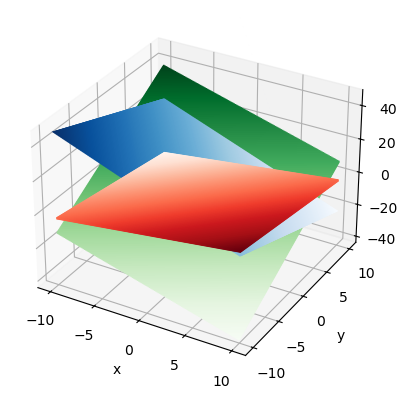

In [42]:
# Now we do some plotting:
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.contour3D(x_2D, y_2D, Z1, 500, cmap='Blues') # Creates 'n=100' contours at different Z to make the surface
ax.contour3D(x_2D, y_2D, Z2, 500, cmap='Reds') # Creates 'n=100' contours at different Z to make the surface
ax.contour3D(x_2D, y_2D, Z3, 500, cmap='Greens') # Creates 'n=100' contours at different Z to make the surface

ax.set_xlabel('x')  # Customised labels for axes
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

### Matrix solution of example 2:


In [43]:
A = np.array([[4, 3, 2], [-2, 2, 3], [3, -5, 2]])

In [44]:
print(A)

[[ 4  3  2]
 [-2  2  3]
 [ 3 -5  2]]


In [45]:
b = np.array([25, -10, -4])

In [46]:
print(b)

[ 25 -10  -4]


In [47]:
X = la.inv(A).dot(b)
print(X)

[ 5.  3. -2.]


## 4. Solving linear equations system wth symbolic algebra (sympy)

#### Documentation:
https://www.sympy.org/en/index.html


#### About Sympy:
SymPy is a Python library for symbolic mathematics. It aims to become a full-featured computer algebra system (CAS) while keeping the code as simple as possible in order to be comprehensible and easily extensible. SymPy is written entirely in Python.

It is similar (or better) to Wolfram Mathematica.

conda install sympy

!pip install sympy

In [52]:
import sympy as sp
from sympy.solvers.solveset import linsolve

Solve: 

$4x + 3y + 2z = 25$

$-2x + 2y + 3z = -10$

$3x -5y + 2z = -4$

### a) Based on a list of equations:

#### 1. Define symbols

In [54]:
# 1. Define symbols

x, y, z = sp.symbols('x, y, z')

In [56]:
#%whos

#### 2) List of equations:

In [59]:
solution = linsolve([4*x + 3*y + 2*z - 25,\
                     -2*x + 2*y + 3*z + 10,\
                     3*x - 5*y + 2*z + 4], (x, y, z)) #input the equations as equating to zero

print(solution)

{(5, 3, -2)}


### b) Using an augmented matrix:

In [64]:
solution2 = linsolve(sp.Matrix(([4, 3, 2, 25],\
                                [-2, 2, 3, -10], [3, -5, 2, -4])), (x, y, z))

print(solution2)
print(type(solution2)) #it's a set of a tuple

#print(solution2[0]) # THis does not work, any alternatives?

# Convert the sympy obj to python native obj -> list
solution2_list = list(solution2)

print(solution2_list)
print(solution2_list[0])
print(solution2_list[0][1])

{(5, 3, -2)}
<class 'sympy.sets.sets.FiniteSet'>
[(5, 3, -2)]
(5, 3, -2)
3


### c) Using a numpy-like matrix (A*x = b) form

In [65]:
M = sp.Matrix(([4, 3, 2, 25], [-2, 2, 3, -10],\
               [3, -5, 2, -4]))

print("Full sympy matrix: ", M)

print("LHS of the matrix: ", M[:, :-1]) #coefficients matrix
print("RHS of the matrix: ", M[:, -1]) #independent array

Full sympy matrix:  Matrix([[4, 3, 2, 25], [-2, 2, 3, -10], [3, -5, 2, -4]])
LHS of the matrix:  Matrix([[4, 3, 2], [-2, 2, 3], [3, -5, 2]])
RHS of the matrix:  Matrix([[25], [-10], [-4]])


In [62]:
# Augmented  matrix

system = A, b = M[:, :-1], M[:, -1]

In [66]:
solution3 = linsolve(system, x, y, z)

print("Solution for x is: ", list(solution3)[0][0]) #remember to convert first to a list
print("Solution for y is: ", list(solution3)[0][1])
print("Solution for z is: ", list(solution3)[0][2])

Solution for x is:  5
Solution for y is:  3
Solution for z is:  -2
